<a href="https://colab.research.google.com/github/GuiifCorso/DataScienceAluraVOZ/blob/main/AluraVOZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
FILE_NAME = 'Telco-Customer-Churn.json'
df_churn_raw = pd.read_json(FILE_NAME)

cols_to_normalize = ['customer', 'internet', 'account', 'phone']
for col in cols_to_normalize:
    if col in df_churn_raw.columns:
        normalized_col = pd.json_normalize(df_churn_raw[col])
        df_churn_raw = df_churn_raw.drop(col, axis=1)
        df_churn_raw = pd.concat([df_churn_raw, normalized_col], axis=1)

df_churn = df_churn_raw

In [62]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


#Interpretação
Pelas informações do dataframe, o tipo de dado da coluna Charges.Total está como objeto, mas o utilizável seria do tipo número, ou float64.
Veremos o que pode causar tal erro.

In [63]:
#Convertendo toda a coluna para o tipo numérico
total_charges = pd.to_numeric(df_churn['Charges.Total'], errors='coerce')

#Verificando quais valores não foram convertidos ou estão nulos
nan_charges = total_charges.isnull()

#Visualizando os valores que não foram convertidos
df_churn.loc[nan_charges, 'Charges.Total']

,Charges.Total
975,
1775,
1955,
2075,
2232,
2308,
2930,
3134,
3203,
4169,


Como pode-se ver, os valores estão nulos, ou seja, a cobrança total nestes casos foi de zero. Podemos nos aprofundar e visualizar as outras colunas que podem relacionar os preços ao total, como a coluna do preço do plano e dos meses de contrato.

In [64]:
df_churn.loc[nan_charges, ['tenure', 'Charges.Monthly']]

,tenure,Charges.Monthly
975,0,56.05
1775,0,20.00
1955,0,61.90
2075,0,19.70
2232,0,20.25
2308,0,25.35
2930,0,73.35
3134,0,25.75
3203,0,52.55
4169,0,80.85


"Tenure" representa a quantidade de meses de contrato do cliente. Nesses casos, os clientes estão há "0 meses" com o plano, ou seja, compraram neste mês.
Dito isso, podemos supor que o total que o cliente pagou foi equivalete ao preço mensal do contrato.

In [65]:
#Preenchendo todos os valores vazios da coluna de cobranças totais com as cobranças mensais
total_charges.fillna(df_churn['Charges.Monthly'], inplace=True)

#Atualizando no dataframe original
df_churn['Charges.Total'] = total_charges

#Visualizando os valores
df_churn.loc[nan_charges][['Charges.Monthly', 'Charges.Total']]

,Charges.Monthly,Charges.Total
975,56.05,56.05
1775,20.00,20.00
1955,61.90,61.90
2075,19.70,19.70
2232,20.25,20.25
2308,25.35,25.35
2930,73.35,73.35
3134,25.75,25.75
3203,52.55,52.55
4169,80.85,80.85


In [66]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


Como podemos ver, a coluna "Charges.Total" está no tipo float64 agora, o que conclui nosso primeiro desafio com o dataframe.
Agora vamos analisar a coluna dos churns.

In [67]:
for col in df_churn.columns.values:
  print(f"A coluna {col} tem os valores: ", df_churn[col].unique())

A coluna customerID tem os valores:  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
A coluna Churn tem os valores:  ['No' 'Yes' '']
A coluna gender tem os valores:  ['Female' 'Male']
A coluna SeniorCitizen tem os valores:  [0 1]
A coluna Partner tem os valores:  ['Yes' 'No']
A coluna Dependents tem os valores:  ['Yes' 'No']
A coluna tenure tem os valores:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
A coluna InternetService tem os valores:  ['DSL' 'Fiber optic' 'No']
A coluna OnlineSecurity tem os valores:  ['No' 'Yes' 'No internet service']
A coluna OnlineBackup tem os valores:  ['Yes' 'No' 'No internet service']
A coluna DeviceProtection tem os valores:  ['No' 'Yes' 'No internet service']
A coluna TechSupport tem os valores:  ['Yes' 'No' 'No internet service']
A coluna 

Podemos ver que a coluna dos churns, possui três valores: Não, sim e ' '.
O valor vazio não representa nada, e é algo a ser obsvervado no dataframe.
Não temos uma forma clara de preencher o vazio das linhas. Preencher aleatóriamente com "Sim" ou "Não" não parece uma boa escolha, como também preencher tudo com Sim, ou tudo com Não, também não.
Talvez a melhor opção, neste caso, seja jogar fora as linhas que não possuem informação, já que não se tem uma ideia de como preenche-las.

In [68]:
df_churn['Churn'][df_churn['Churn'] == ''].count()

224

Temos 224 linhas sem informação dentro de um dataframe de mais de 7000 linhas. Isso representa um total de 3% do dataframe. Como a proporção é bem pequena, não há grandes problemas em remover tais linhas, mas sempre é necessário avaliar a situação em que se encontra.

In [69]:
# Removendo as linhas com valores vazios na coluna "Churn"
df_churn = df_churn[df_churn['Churn'] != '']

df_churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Com a coluna Churn preenchida, podemos seguir com algumas análises relacionais.

<Axes: xlabel='Churn', ylabel='tenure'>

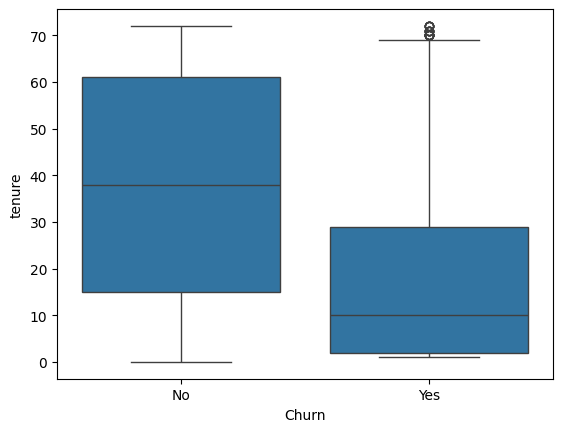

In [70]:
# Relação de cancelamento x tempo de contrato
sns.boxplot(x='Churn', y='tenure', data=df_churn)

# Conclusão: Pessoas com mais tempo de contrato tendem a continuar como clientes. Pessoas com uma média de 10 meses de contrato tem maiores chances de cancelar o plano.

<Axes: xlabel='gender', ylabel='count'>

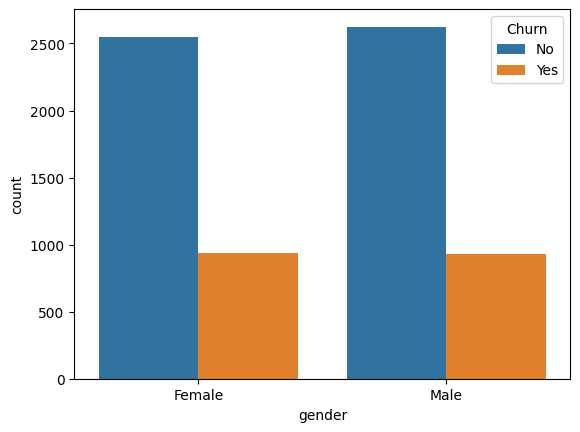

In [12]:
# Relação cancelamento x gênero
sns.countplot(x='gender', hue='Churn', data=df_churn)

# Conclusão: Não há relação de gênero na questão de cancelamento

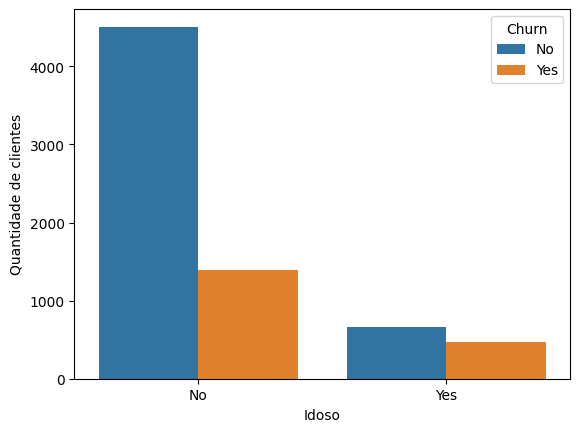

In [13]:
# Relação cancelamento x idoso

churn_senior = sns.countplot(x='SeniorCitizen', hue='Churn', data=df_churn, )
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Quantidade de clientes")
plt.xlabel("Idoso")
plt.show()

# Conclusão: clientes mais idosos tendem a cancelar mais os planos em relação ao total de clientes idosos (porcentagem)

<Axes: xlabel='Churn', ylabel='Charges.Monthly'>

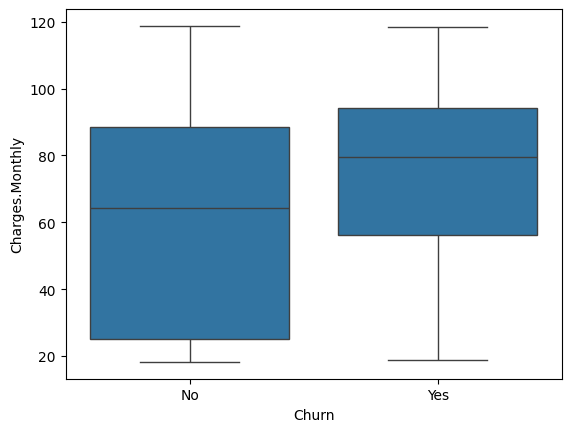

In [14]:
sns.boxplot(
    x='Churn',
    y='Charges.Monthly',
    data=df_churn
)

# Criação de um modelo de predição

Poderiamos ficar avaliando os dados e como eles se relacionam graficamente. Mas meu objetivo neste projeto é explorar as capacidades de modelos de machine learning para prever o comportamento de futuros clientes.
Isto é o que será feito a partir de agora.

In [71]:
# Importando as bibliotecas para machine learning

# prompt: importe as bibliotecas para machine learning

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [72]:
# Definindo os dados

# Como queremos prever o "churn", definiremos ele como nosso y
y = df_churn['Churn']

# As colunas que serão usadas como análise pelo modelo serão todas as colunas, menos o próprio churn e o ID do cliente (dado inútil para a análise)
X = df_churn.drop(['Churn', 'customerID'], axis=1)

# Modelos numéricos
Uma coisa super importante vale ressaltar: o modelo trabalha bem com números, mas não com palavras.
Se olharmos para nossas colunas de X, teremos vários valores como "male", "female" e etc, que, na linguagem do modelo não significam nada, ou seja, o modelo (o qual estamos usando) não consgue analisar tais dados para fazer as predições, por isso devemos transformar os dados que estão como objetos, em números, sejam floats ou inteiros.

# Conversões de dados
Para isso, existem alguns tipos de conversões, mas a que iremos usar será a one-hot-encoding, que separará os diferentes dados de uma mesma coluna e irá criar uma nova coluna para cada variável. Por exemplo, na coluna InternetService, temos "DSL", "FiberOptic" e "No" na mesma coluna. O que o one-hot-encoding irá fazer é criar uma coluna para cada dessas variáveis e atribuir valores de 0 ou 1 para aquela linha, representando sim ou não, respectivamente.

Ex:
InternetService = "DSL":

                            DSL   FiberOptic     No
                            1         0          0

  

In [73]:
# Aplicando o one-hot-encoding

for col in X.columns: # Percorrendo todas as colunas do nosso dataframe reduzido (X)
  if X[col].dtype == 'object': # Buscando somente os de tipo objeto
    X = pd.get_dummies(X, columns=[col]) # Aplicando o one-hot-encoding

y.unique()

array(['No', 'Yes'], dtype=object)

In [74]:
for col in X.columns.values:
  print(f"A coluna {col} tem os valores: ", X[col].unique())

A coluna SeniorCitizen tem os valores:  [0 1]
A coluna tenure tem os valores:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
A coluna Charges.Monthly tem os valores:  [65.6  59.9  73.9  ... 91.75 68.8  67.85]
A coluna Charges.Total tem os valores:  [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
A coluna gender_Female tem os valores:  [ True False]
A coluna gender_Male tem os valores:  [False  True]
A coluna Partner_No tem os valores:  [False  True]
A coluna Partner_Yes tem os valores:  [ True False]
A coluna Dependents_No tem os valores:  [False  True]
A coluna Dependents_Yes tem os valores:  [ True False]
A coluna InternetService_DSL tem os valores:  [ True False]
A coluna InternetService_Fiber optic tem os valores:  [False  True]
A coluna InternetService_No tem os valores:  [False  True]
A coluna Onlin

In [112]:
# A coluna dos churns está em "Yes" ou "No", ou seja, também precisa ser encodada
y = y.replace({"Yes": 1, "No": 0})

# Incializando o modelo e realizando as predições

Agora com todos os dados como números, podemos encaixá-los no modelo.

In [114]:
# Dividindo os dados entre treino e teste. Usaremos um fator de 30% para o teste (2100 linhas de dados)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Criando o modelo

model = DecisionTreeRegressor(max_leaf_nodes=500) # Escolhendo 500 folhas

# Encaixando os dados no modelo

model.fit(X_train, y_train)

# Predizendo os dados

y_pred_tree = model.predict(X_test)

# Avaliando o modelo

mean_absolute_error(y_test, y_pred_tree)

0.2702498875908132

In [115]:
# Função para descobrir a melhor quantidade de leaves para o modelo

def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    return mean_absolute_error(y_test, model.fit(X_train, y_train).predict(X_test))

In [116]:
leaves_to_test = [100, 200, 500, 1000]

for leave in leaves_to_test:
    print(f"Leaves: {leave} \t\t MAE: {get_mae(leave, X_train, X_test, y_train, y_test)}")

Leaves: 100 		 MAE: 0.2651563373716252
Leaves: 200 		 MAE: 0.2644337181689012
Leaves: 500 		 MAE: 0.2708527316626586
Leaves: 1000 		 MAE: 0.2728348319924278


Como o modelo de melhor performance foi o com 500 folhas (0.268 de erro médio), iremos o escolher para avaliar os dados.

In [111]:
y_pred = pd.DataFrame(y_pred_tree)

In [117]:
from sklearn.metrics import confusion_matrix

# Conversão binária (0 e 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_binary)

print(cm)


[[1198  372]
 [ 417  126]]


A matriz de confusão acima mostra como as predições foram dispersadas dentro do teste.
Um total de 1602 de acertos para 511 erros, dentre eles, 1313 verdadeiros-positivos, 289 verdadeiros-falsos, 218 falsos-positivos e 293 verdadeiros-negativos.
Existem outros modelos que podem proporcionar um menor erro, que veremos a seguir.

In [118]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo
forest_model = RandomForestRegressor(random_state=1)

# Encaixando os dados no modelo
forest_model.fit(X_train, y_train)

# Predizendo os dados
y_pred_forest = forest_model.predict(X_test)

# Avaliando o modelo
print(mean_absolute_error(y_test, y_pred_forest))

# Conversão binária (0 e 1)
y_pred_forest_binary = (y_pred_forest > 0.5).astype(int)

# Criando a matriz de confusão
cm_forest = confusion_matrix(y_test, y_pred_forest_binary)

print(cm_forest)


0.27385779640772545
[[1368  202]
 [ 262  281]]


In [119]:
from sklearn.linear_model import LinearRegression

# Modelo
linear_model = LinearRegression()

# Alimentando o modelo com os dados
linear_model.fit(X_train, y_train)

# Predições
y_pred_linear = linear_model.predict(X_test)

# Avaliando erro médio
print(mean_absolute_error(y_test, y_pred_linear))

# Conversão binária (0 e 1)
y_pred_linear_binary = (y_pred_linear > 0.5).astype(int)

# Criando a matriz de confusão
cm_linear = confusion_matrix(y_test, y_pred_linear_binary)

print(cm_linear)

0.2962819560344423
[[1419  151]
 [ 264  279]]


In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Escalando os dados (manter as mesmas proporções entre as variáveis - como são somente 0 e 1, não seria necessário)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors

# Encaixando no modelo (lá ele)
knn_model.fit(X_train, y_train)

# Predição
y_pred_knn = knn_model.predict(X_test)

# Avaliando o modelo
print(mean_absolute_error(y_test, y_pred_knn))

# Criando a matriz de confusão
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(cm_knn)

0.23473734027449125
[[1311  259]
 [ 237  306]]


In [121]:
# Precisão de todos os modelos
from sklearn.metrics import precision_score

tree_precision = precision_score(y_test, y_pred_binary)
forest_precision = precision_score(y_test, y_pred_forest_binary)
linear_precision = precision_score(y_test, y_pred_linear_binary)
knn_precision = precision_score(y_test, y_pred_knn)

In [122]:
df_preds = pd.DataFrame(
    {
        "Model": ["Decision Tree", "Random Forest", "Linear Regression", "KNN"],
        "Precision": [tree_precision, forest_precision, linear_precision, knn_precision],
    }
)

df_preds

,Model,Precision
0,Decision Tree,0.253012
1,Random Forest,0.581781
2,Linear Regression,0.648837
3,KNN,0.541593


# Análise das precições

Como podemos ver na tabela de precisão, o modelo com maior precisão foi o modelo de regressão linear.

Conhecimento interessante que adquiri durante a pesquisa para este código:

# MAE  x Precisão

MAE é, resumidademente, o erro médio de um modelo, ou seja, como a distância dos dados preditados se comportam em relação a uma média. Um MAE grande significa que o modelo pode fazer predições com uma ampla magnitude de erro, por exemplo, um valor que era para ser 200 acaba por ser 400.
Um MAE alto significa que o seu modelo tem uma dificuldade em se aproximar dos dados, mas **não necessariamente possui uma baixa precisão.**
A precisão é a medida que compara a quantidade de acertos com os erros, ou seja, acertos/total nos da a proporção de acertos do modelo.
Mas como a precisão não está diretamente relacionada ao MAE?

Bom, isso pode ser explicado com o seguinte: Suponha que você possui uma lista de valores que você quer predizer, e utiliza alguns modelos para isso.
O MAE irá avaliar o quão próximo seus resultados estão do verdadeiro, por outra visão, seria o módulo da distância entre dois pontos em uma reta.
Se a distância for grande entre a maioria dos pontos preditos e os pontos reais, o MAE será grande.
Por exemplo:


    Pontos reais    Predição     Distância
        2             1             1
        3             3             0
        1             4             3

O MAE é a média destas distância. Note que o MAE não nos diz exatamente se os dados estão certos ou errados, apenas nos da a proximidade com os atuais, mas isso não significa que um modelo com baixo MAE teria uma precisão maior.

Por exemplo:

  1) Baixo MAE, Baixa precisão

  O que acontece aqui, é que seus dados preditos estão bem próximos aos dados reais, porém igualmente dispersos. É como atirar flechas várias vezes em um alvo e elas estares próxima ao centro, mas com muitas delas ao redor, causando uma grande dispersão média.

  1) Alto MAE, Alta precisão

  Neste caso, seus dados podem ser imprevisíveis, mas possuem uma boa taxa de acerto. Por exemplo, se atirarmos flechas sobre um alvo repetidas vezes e a maioria delas acertarem o centro, porém algumas delas podem desviar muito do alto, atingindo o as bordas.

Obviamente um modelo pode ter ambos MAE baixo e alta precisão, mas o que é interessante ressaltar é que **eles não estão conectados.**

# OBS
Esqueci de colocar o random_state na maioria dos modelos, então os dados que são ditos durante as explicações podem variar um pouco...